# CVAI - SW 05 - Do - Exercise

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

## Exercise 1: Hough Transformation

Use the Hough transform to detect lines in the following image:

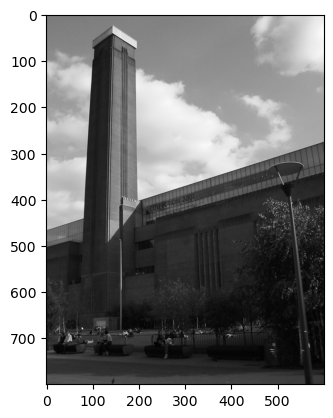

In [2]:
img1 = cv.imread ('Images/LondonSmall.png')
pl.imshow (img1)

Different implementations are available. In OpenCV you may use `HoughLines` to compute the lines found directly. 

https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html

The Implementation from skimage.transform is performed in 2 steps: `hough_lines` computes the accumulator
and `hough_lines_peaks` finds the maxima. Using this implementation enables you to plot the accumulator.

Use `HoughLines` to detect the lines in an edge image. Plot your results and the accumulator.

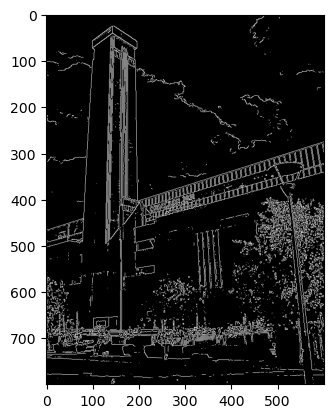

In [5]:
edg = cv.Canny (img1, 50, 50, apertureSize = 3, L2gradient = True)
pl.imshow (edg, cmap = 'gray')

In [23]:
from skimage.transform import probabilistic_hough_line

lines = probabilistic_hough_line(edg, threshold=10, line_length=5, line_gap=3)

Plot the lines found by the Hough transform directly onto the image. You will find an example on

http://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html#sphx-glr-auto-examples-edges-plot-line-hough-transform-py

You should convert polar coordinates into cartesian coordinates and calculate the endpoints of the lines.


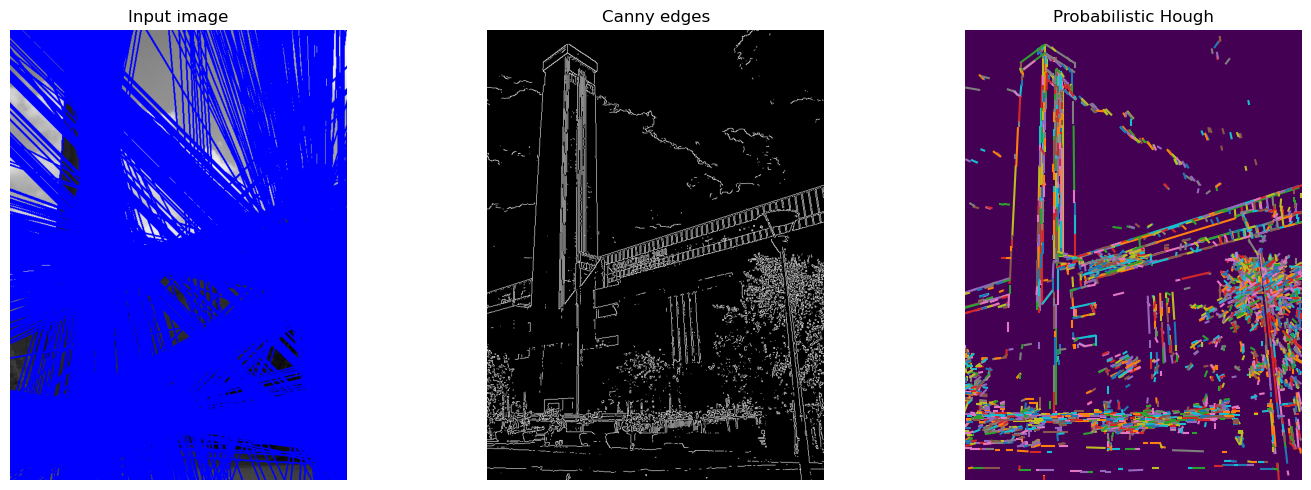

In [24]:
# Generating figure 2
fig, axes = pl.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img1, cmap= 'gray')
ax[0].set_title('Input image')

ax[1].imshow(edg, cmap= 'gray')
ax[1].set_title('Canny edges')

ax[2].imshow(edg * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, img1.shape[1]))
ax[2].set_ylim((img1.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

pl.tight_layout()
pl.show()


## Exercise 2: SIFT Feature Extraction and Matching

First we want to extract SIFT features from an image and visualize them. Do this for the following image. Refer to the tutorial here:

https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html

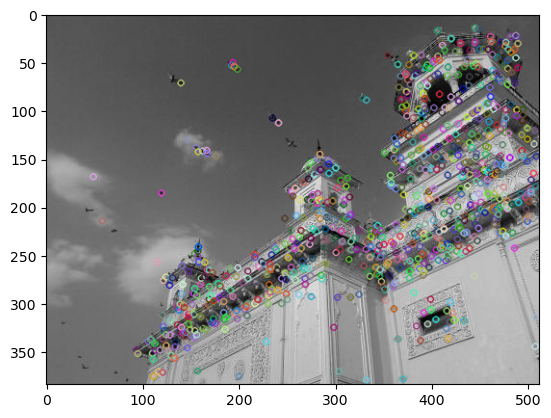

In [25]:
img = cv.imread ('Images/home.jpg')
gray = cv.cvtColor (img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect (gray, None)

img = cv.drawKeypoints (gray,kp,img)
#cv.imwrite ('sift_keypoints.jpg', img)
pl.imshow (img)

Second we want to match corresponding features in two images using a brute-force matcher.

Refer to the tutorial https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

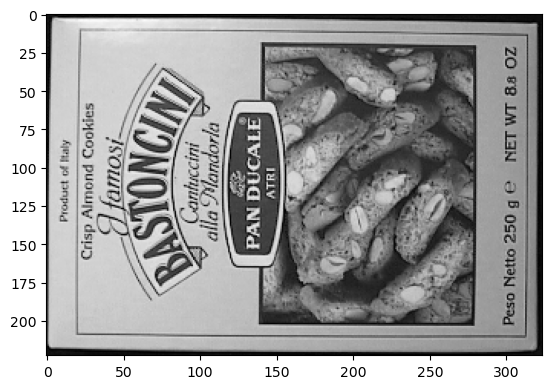

In [26]:
img1 = cv.imread ('Images/box.png', cv.IMREAD_GRAYSCALE)
pl.imshow (img1, cmap = 'gray')

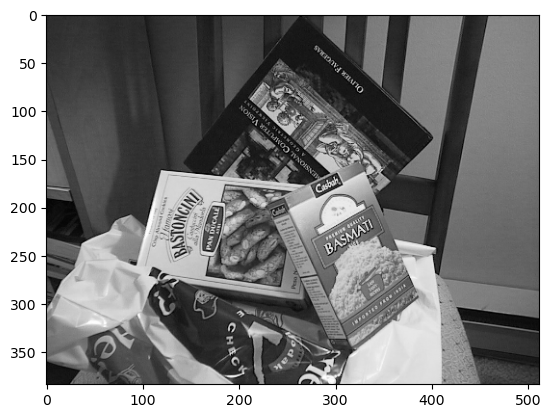

In [27]:
img2 = cv.imread ('Images/box_in_scene.png', cv.IMREAD_GRAYSCALE)
pl.imshow (img2, cmap = 'gray')

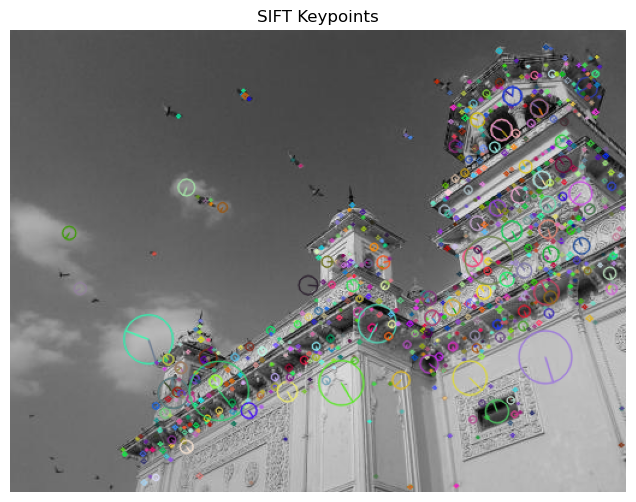

In [29]:
sift = cv.SIFT_create()

# Keypoints erkennen
kp = sift.detect(gray, None)

# Keypoints ins Bild zeichnen
img_with_kp = cv.drawKeypoints(gray, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Ergebnis anzeigen mit pl
pl.figure(figsize=(10, 6))
pl.imshow(img_with_kp, cmap='gray')
pl.axis('off')
pl.title("SIFT Keypoints")
pl.show()

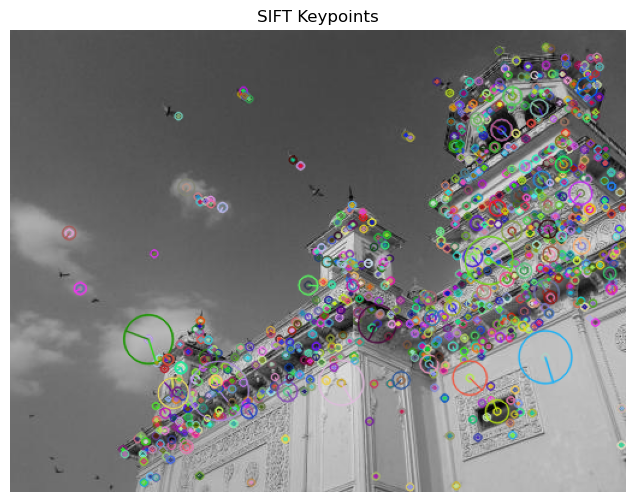

In [30]:
img_with_kp = cv.drawKeypoints(img, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Ergebnis anzeigen mit pl (Matplotlib)
pl.figure(figsize=(10, 6))
pl.imshow(cv.cvtColor(img_with_kp, cv.COLOR_BGR2RGB))  # OpenCV verwendet BGR, daher konvertieren wir es nach RGB
pl.axis('off')  # Achsen ausschalten
pl.title("SIFT Keypoints")
pl.show()

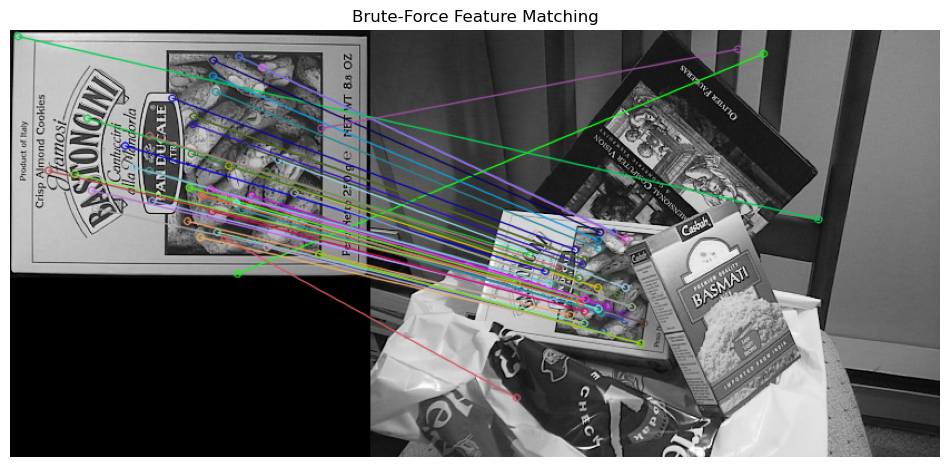

In [31]:
# BFMatcher with default params
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Brute-Force Matcher mit L2-Norm (Standardparameter)
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)

# Matches berechnen
matches = bf.match(des1, des2)

# Matches nach Distanz sortieren (beste zuerst)
matches = sorted(matches, key=lambda x: x.distance)

# Die besten 50 Matches auswählen
img_matches = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Ergebnis anzeigen mit pl (Matplotlib)
pl.figure(figsize=(12, 6))
pl.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))  # Konvertiere von BGR zu RGB
pl.axis('off')  # Achsen ausschalten
pl.title("Brute-Force Feature Matching")
pl.show()

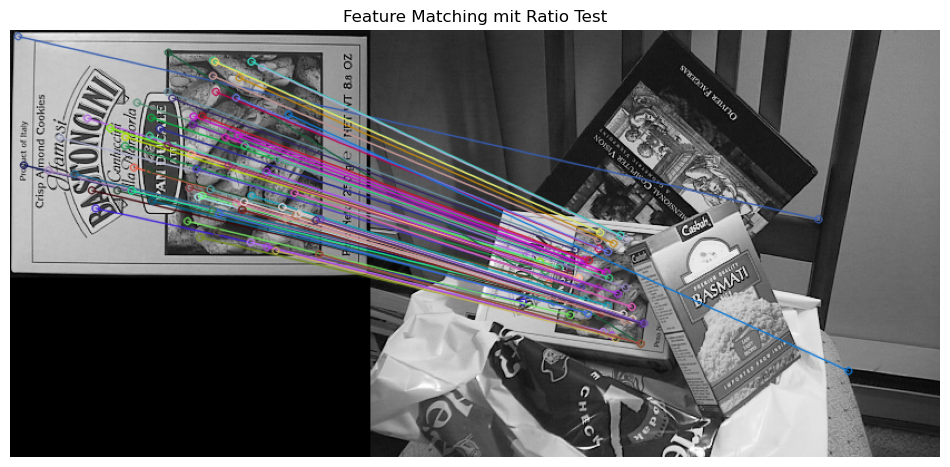

In [33]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Brute-Force Matcher mit L2-Norm (Standardparameter)
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=False)

# Matches berechnen
matches = bf.knnMatch(des1, des2, k=2)  # knnMatch findet für jedes Deskriptor-Paar die besten 2 Matches

# Ratio Test anwenden
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Wenn der beste Match wesentlich besser ist als der zweitbeste
        good_matches.append(m)

# Die besten Matches im Bild anzeigen
img_matches = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Ergebnis anzeigen mit pl (Matplotlib)
pl.figure(figsize=(12, 6))
pl.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))  # Konvertiere von BGR zu RGB
pl.axis('off')  # Achsen ausschalten
pl.title("Feature Matching mit Ratio Test")
pl.show()

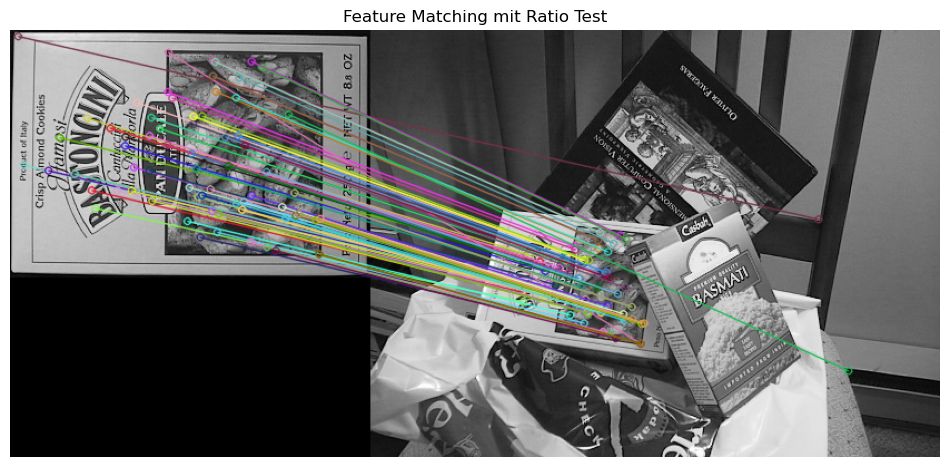

In [34]:
# draw matches onto image
# Brute-Force Matcher mit L2-Norm (Standardparameter)
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=False)

# Matches berechnen
matches = bf.knnMatch(des1, des2, k=2)  # knnMatch findet für jedes Deskriptor-Paar die besten 2 Matches

# Ratio Test anwenden
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Wenn der beste Match wesentlich besser ist als der zweitbeste
        good_matches.append(m)

# Die besten Matches im Bild anzeigen
img_matches = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Ergebnis anzeigen mit pl (Matplotlib)
pl.figure(figsize=(12, 6))
pl.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))  # Konvertiere von BGR zu RGB
pl.axis('off')  # Achsen ausschalten
pl.title("Feature Matching mit Ratio Test")
pl.show()